In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import re

In [94]:
text = """Awareness of luxury brands worldwide 2022	
Most recognized luxury brands worldwide in 2022, as an index score	
	
Gucci (Kering)	97
Chanel (Chanel Limited)	97
Louis Vuitton (LVMH)	96
Prada (Prada)	95
Dior (LVMH)	94
Hermès (Hermès International)	92
Ralph Lauren (Ralph Lauren)	91
Saint Laurent (Kering)	87
Balenciaga (Kering)	87
Burberry (Burberry)	86
Fendi (LVMH)	86
Givenchy (LVMH)	86
Versace (Capri Holdings)	85
Dolce & Gabbana	84
Bottega Veneta	82
Giorgio Armani (Giorgio Armani)	81
Hugo Boss (Hugo Boss)	80
Michael Kors (Capri Holdings)	79
Celine (LVMH)	76
Chloé	75
Tom Ford	75
"""

In [95]:
df=pd.read_csv(io.StringIO(text), sep='\t',skiprows=3,names=['brand_owner','Awareness'])
df

,brand_owner,Awareness
0,Gucci (Kering),97
1,Chanel (Chanel Limited),97
2,Louis Vuitton (LVMH),96
3,Prada (Prada),95
4,Dior (LVMH),94
5,Hermès (Hermès International),92
6,Ralph Lauren (Ralph Lauren),91
7,Saint Laurent (Kering),87
8,Balenciaga (Kering),87
9,Burberry (Burberry),86


In [96]:
dt=df['brand_owner'].str.split('(',expand=True)
dt

,0,1
0,Gucci,Kering)
1,Chanel,Chanel Limited)
2,Louis Vuitton,LVMH)
3,Prada,Prada)
4,Dior,LVMH)
5,Hermès,Hermès International)
6,Ralph Lauren,Ralph Lauren)
7,Saint Laurent,Kering)
8,Balenciaga,Kering)
9,Burberry,Burberry)


In [97]:
dt.columns = ['Brand', 'Owner']

In [98]:
dt2=pd.concat([dt,df['Awareness']],axis=1)
dt2['Owner']=dt2['Owner'].str[:-1]
dt2

,Brand,Owner,Awareness
0,Gucci,Kering,97
1,Chanel,Chanel Limited,97
2,Louis Vuitton,LVMH,96
3,Prada,Prada,95
4,Dior,LVMH,94
5,Hermès,Hermès International,92
6,Ralph Lauren,Ralph Lauren,91
7,Saint Laurent,Kering,87
8,Balenciaga,Kering,87
9,Burberry,Burberry,86


In [99]:
import seaborn as sns

Text(0.5, 1.0, 'Awareness of luxury brands worldwide 2022')

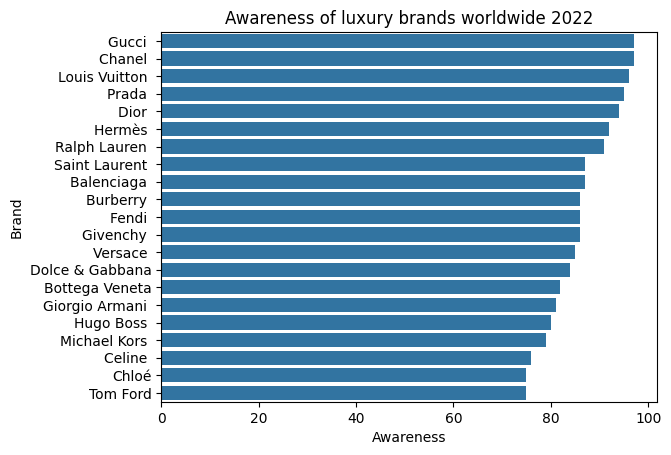

In [100]:
sns.barplot(data=dt2,x='Awareness',y='Brand')
plt.title(text.split("\n")[0].strip())

In [101]:
dt3=pd.read_csv('https://github.com/prasertcbs/454_2566/raw/main/data/Top%2015%20Automakers%20in%20the%20World.csv')
dt3

,Automaker,Year,Sold Autos,Status,World Rank
0,Toyota,2022,9566961,↑ 1%,1
1,Toyota,2021,9562483,↑ 1%,1
2,Toyota,2020,9528753,↓ 11%,1
3,VW,2022,8263104,↓ 7%,2
4,VW,2021,8882346,↓ 5%,2
5,VW,2020,9305427,↓ 15%,2
6,Hyundai Kia,2022,6848198,↑ 3%,3
7,Hyundai Kia,2021,6668037,↑ 5%,3
8,Hyundai Kia,2020,6353514,↓ 12%,4
9,Stellantis,2022,6002900,↓ 2%,4


In [102]:
dt3["Status"] = dt3["Status"].str.replace("%", "").str.replace("↑ ", "").str.replace("↓ ", "-").astype(float) / 100
dt3


,Automaker,Year,Sold Autos,Status,World Rank
0,Toyota,2022,9566961,0.01,1
1,Toyota,2021,9562483,0.01,1
2,Toyota,2020,9528753,-0.11,1
3,VW,2022,8263104,-0.07,2
4,VW,2021,8882346,-0.05,2
5,VW,2020,9305427,-0.15,2
6,Hyundai Kia,2022,6848198,0.03,3
7,Hyundai Kia,2021,6668037,0.05,3
8,Hyundai Kia,2020,6353514,-0.12,4
9,Stellantis,2022,6002900,-0.02,4


In [103]:
dt3.columns

Index(['Automaker', 'Year', 'Sold Autos', 'Status', 'World Rank'], dtype='object')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

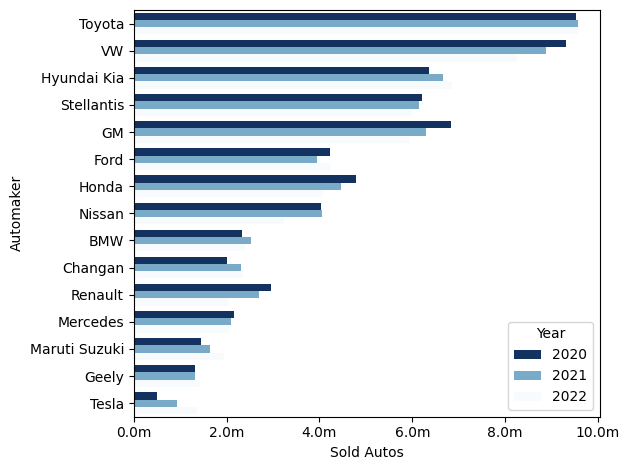

In [105]:
import matplotlib.ticker as ticker
g=sns.barplot(data=dt3,x="Sold Autos",y="Automaker",hue='Year',palette='Blues_r')
g.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1e6:,.1f}m"))
plt.tight_layout()
plt.savefig('a2.png')
plt.savefig('a2.svg')